# Traditional Statistical Models with statsmodels

[Resource](https://www.youtube.com/watch?v=pDQEIRhhg9k)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

duncan_prestige = sm.datasets.get_rdataset('Duncan', 'carData').data

# Example Datasets

The Duncan data frame has data on the prestige and other characteristics of 45 U.S. occupations in 1950.
* `type`: Type of occupation. A factor with the following levels: `prof`, professional and managerial, `wc`, white-collar, `bc`, blue-collar.
* `income`: Percentage of occupational incumbents in 1950 U.S. Census who earned $3,500 or more per year.
* `education`: Percentage of respondents in a social survey who rated the occupation as "good" or better in prestige.

In [32]:
duncan_prestige.shape, duncan_prestige.head()

((45, 4),
             type  income  education  prestige
 rownames                                     
 accountant  prof      62         86        82
 pilot       prof      72         76        83
 architect   prof      75         92        90
 author      prof      55         90        76
 chemist     prof      64         86        90)

# A Simple OLS Example

We enter the values as arrays: one for the `x` values and one for the `y` values.

We'll fit a simple model seeing if there is a relationship between education and income, predicting income based on education.

In [33]:
y = duncan_prestige['income']
X = duncan_prestige['education']

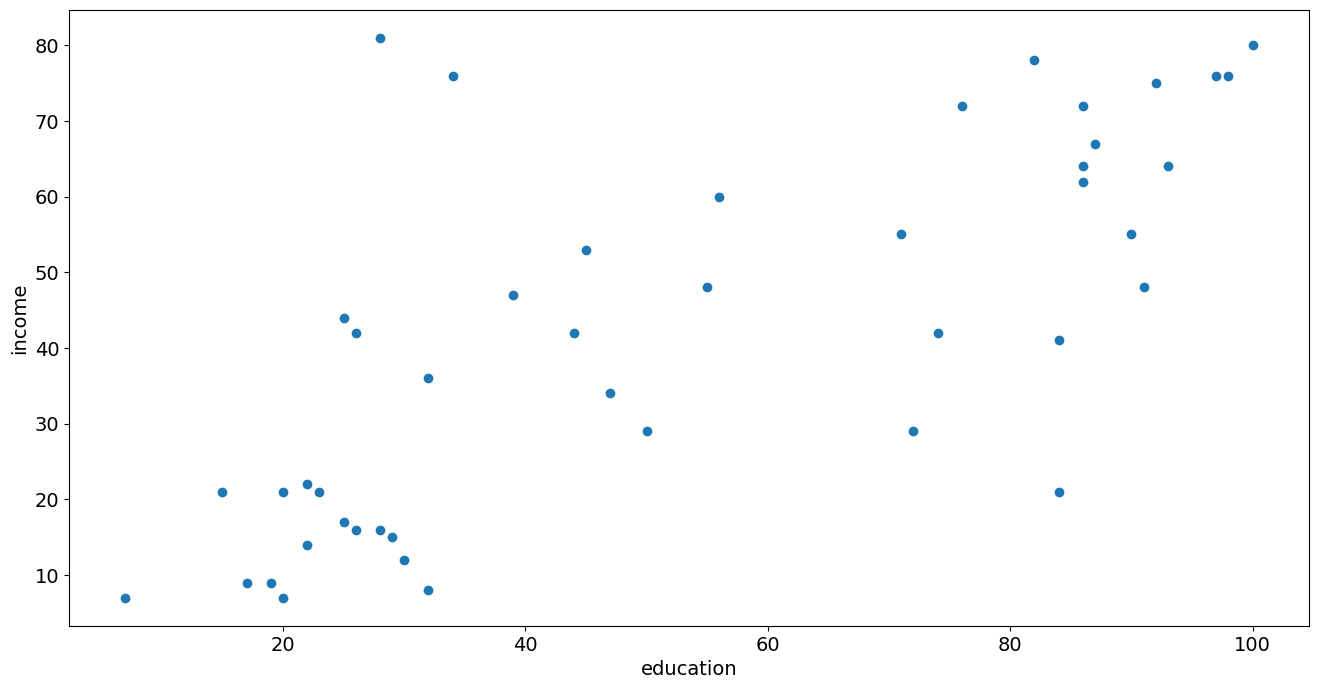

In [34]:
plt.scatter(X, y)
plt.xlabel('education')
plt.ylabel('income')
plt.show();

## Matrix notation for OLS

The regular statsmodel OLS model uses matrix notation (unless you call the `statsmodels.formula` api).

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i$$

$$\hat{y} = \beta_0 + \beta_1 x_i$$

$$\mathbf{X}\boldsymbol{\beta} = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_N \end{bmatrix} \times \begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} = \begin{bmatrix} \beta_0 + \beta_1 x_1 \\ \beta_0 + \beta_1 x_2 \\ \vdots \\ \beta_0 + \beta_1 x_N \end{bmatrix}$$

$$\hat{\mathbf{Y}} = \mathbf{X}\boldsymbol{\beta}$$

In order for the X matrix and the beta matrix to multiply properly, the X matrix needs to be an nx2 matrix, since there's two terms in beta. Therefore, we append a column of ones to the x matrix.

## Adding a column of constants

As already stated, in order for the matrix multiplication to work, we need to append a column of 1s to the xi values.

In [35]:
X = sm.add_constant(X)
X.shape, y.shape

((45, 2), (45,))

## Fit the model

In [36]:
ols_model = sm.OLS(y, X).fit()

## Model results

The result of `model.fit()` is a `.RegressionResults` object.

In [37]:
ols_model

In [38]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.84e-08
Time:                        15:30:28   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6035      5.198      2.040      0.0

## Properties of Model Results

You can access the values from the fitted mode.

In [39]:
ols_model.params

const        10.603498
education     0.594859
dtype: float64

In [40]:
ols_model.rsquared

np.float64(0.5249181546907553)

Degrees of freedom. In this case there is 1 because we are estimating only one additional parameter (the slope) vs. the null model.

In [41]:
ols_model.df_model

1.0

Degrees of freedom associated with the residuals. The total data has n-1 = 44 df. The model uses 1 df. This leaves 2 df for the residuals.

In [42]:
ols_model.df_resid

np.float64(43.0)

The rest of the parameters can be found [here](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html)

In [43]:
ols_model.tvalues

const        2.039813
education    6.892802
dtype: float64

In [44]:
ols_model.pvalues

const        4.754253e-02
education    1.839946e-08
dtype: float64

In [45]:
ols_model.f_pvalue

np.float64(1.839946418520907e-08)

In [46]:
ols_model.fittedvalues

rownames
accountant            61.761410
pilot                 55.812816
architect             65.330567
author                64.140848
chemist               61.761410
minister              60.571691
professor             65.925426
dentist               70.089442
reporter              62.356270
engineer              61.761410
undertaker            54.623097
lawyer                68.899723
physician             68.304864
welfare.worker        60.571691
teacher               64.735707
conductor             30.828719
contractor            37.372173
factory.owner         43.915627
store.manager         36.777314
banker                59.381972
bookkeeper            53.433378
mail.carrier          43.320768
insurance.agent       52.838519
store.clerk           40.346470
carpenter             24.285265
electrician           33.803016
RR.engineer           27.259563
machinist             29.639000
auto.repairman        23.690406
plumber               25.474984
gas.stn.attendant     27.854422

## Predicting Values

In [47]:
ols_model.predict()

array([61.76141016, 55.81281576, 65.3305668 , 64.14084792, 61.76141016,
       60.57169128, 65.92542624, 70.08944232, 62.3562696 , 61.76141016,
       54.62309688, 68.89972344, 68.304864  , 60.57169128, 64.73570736,
       30.82871928, 37.37217312, 43.91562696, 36.77731368, 59.3819724 ,
       53.433378  , 43.32076752, 52.83851856, 40.34647032, 24.28526544,
       33.80301648, 27.25956264, 29.6390004 , 23.690406  , 25.47498432,
       27.85442208, 14.7675144 , 26.06984376, 21.90582768, 19.52638992,
       22.50068712, 26.06984376, 27.25956264, 20.7161088 , 23.690406  ,
       28.44928152, 25.47498432, 22.50068712, 38.561892  , 29.6390004 ])

## Predicting values for new observations

Predict an occupation where 55% of people has graduated high school.

In order for this to work, the input needs to be a 1x2 matrix, hence the .`reshape()` method.

In [48]:
xnew = np.array([1, 55]).reshape((1,2))
xnew

array([[ 1, 55]])

In [49]:
ols_model.predict(xnew)

array([43.32076752])

And here's another example for if you wanted different predictions based on several different high school graduation percents.

Here, we added the constant to get the right input shape instead of reshaping.

In [50]:
xnew = np.array([55, 20, 100])
xnew = sm.add_constant(xnew)
xnew

array([[  1.,  55.],
       [  1.,  20.],
       [  1., 100.]])

In [51]:
ols_model.predict(xnew)

array([43.32076752, 22.50068712, 70.08944232])

## Ask for the residuals

In [52]:
ols_model.resid

rownames
accountant             0.238590
pilot                 16.187184
architect              9.669433
author                -9.140848
chemist                2.238590
minister             -39.571691
professor             -1.925426
dentist                9.910558
reporter               4.643730
engineer              10.238590
undertaker           -12.623097
lawyer                 7.100277
physician              7.695136
welfare.worker       -19.571691
teacher              -16.735707
conductor             45.171281
contractor            15.627827
factory.owner         16.084373
store.manager          5.222686
banker                18.618028
bookkeeper           -24.433378
mail.carrier           4.679232
insurance.agent        2.161481
store.clerk          -11.346470
carpenter             -3.285265
electrician           13.196984
RR.engineer           53.740437
machinist              6.361000
auto.repairman        -1.690406
plumber               18.525016
gas.stn.attendant    -12.854422

## Diagnostic plots

We want to see if the residuals appear to be normally distributed and see that they don't follow some kind of pattern "or things like that".

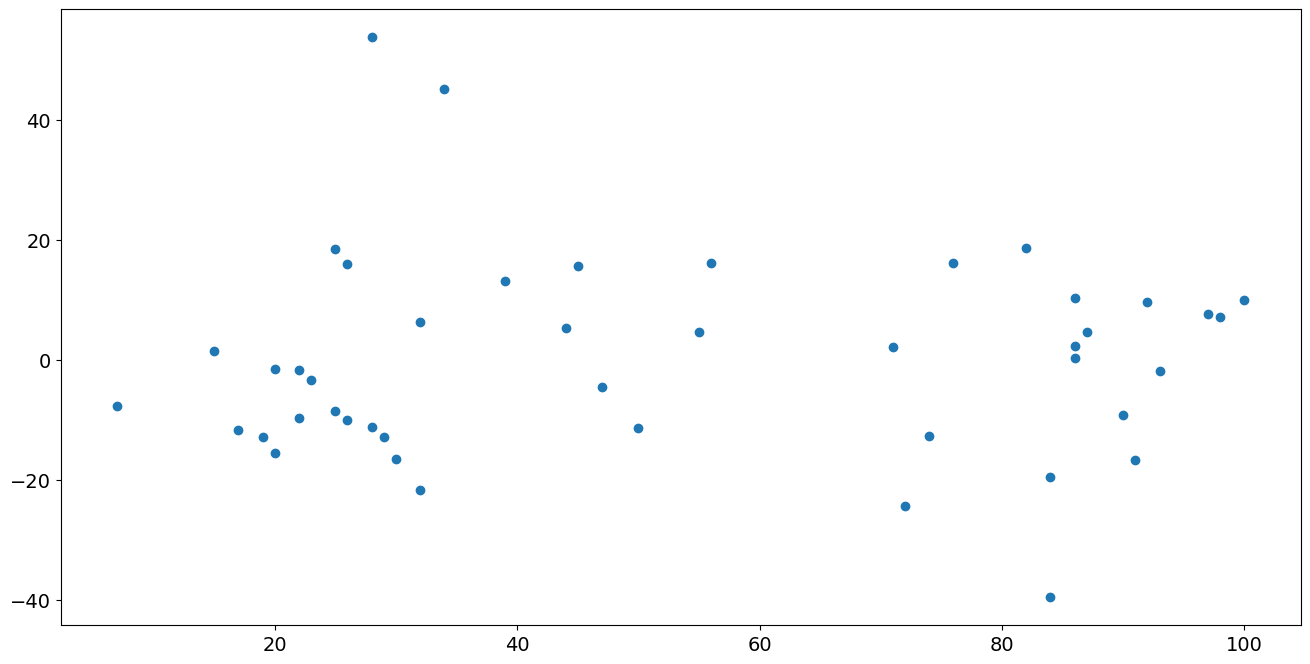

In [53]:
plt.rc('figure', figsize=(16, 8))
plt.rc('font', size=14)

res = ols_model.resid

plt.scatter(X['education'], res);

Doesn't look like there's much of a pattern here... but our professor here doesn't seem too concerned with the details right now. Kinda understandable for such an introductory concept.

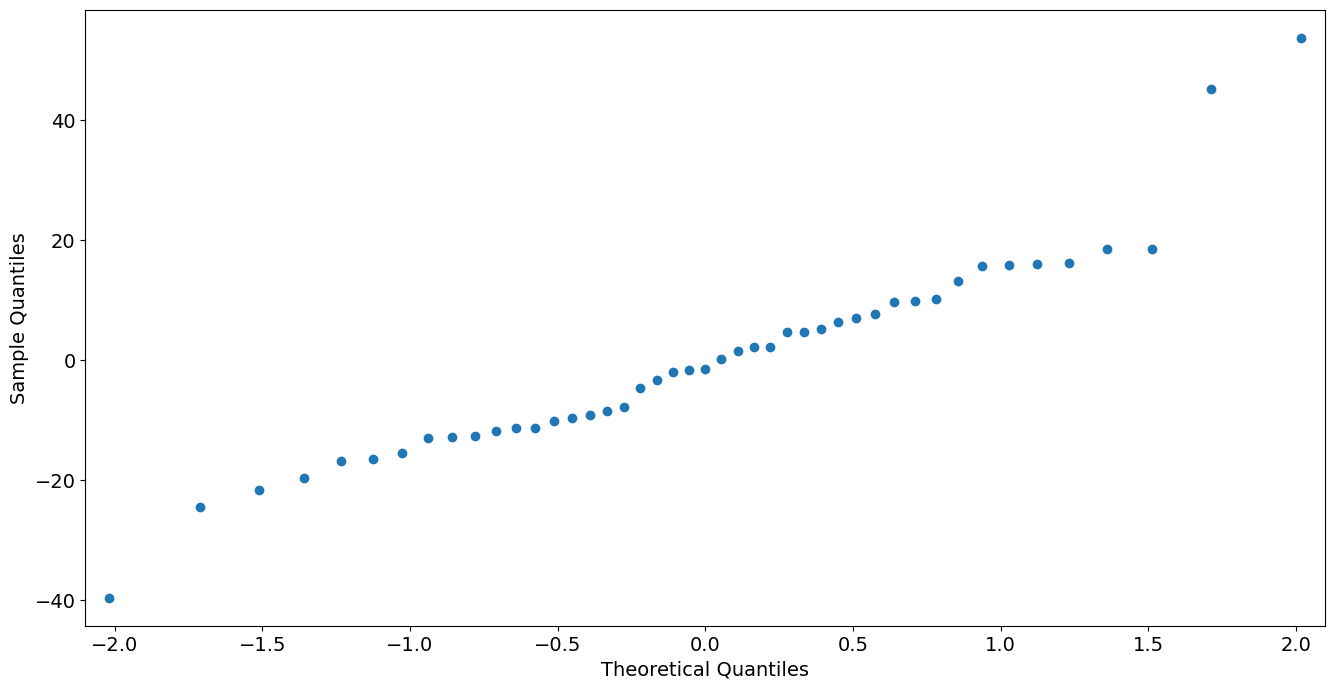

In [54]:
fig = sm.qqplot(res)

For our quantile plot, we're looking for a straight line. The outliers indicate... well... outliers.

Now let's check out the influence plot using the "cooks" criterion for leverage.

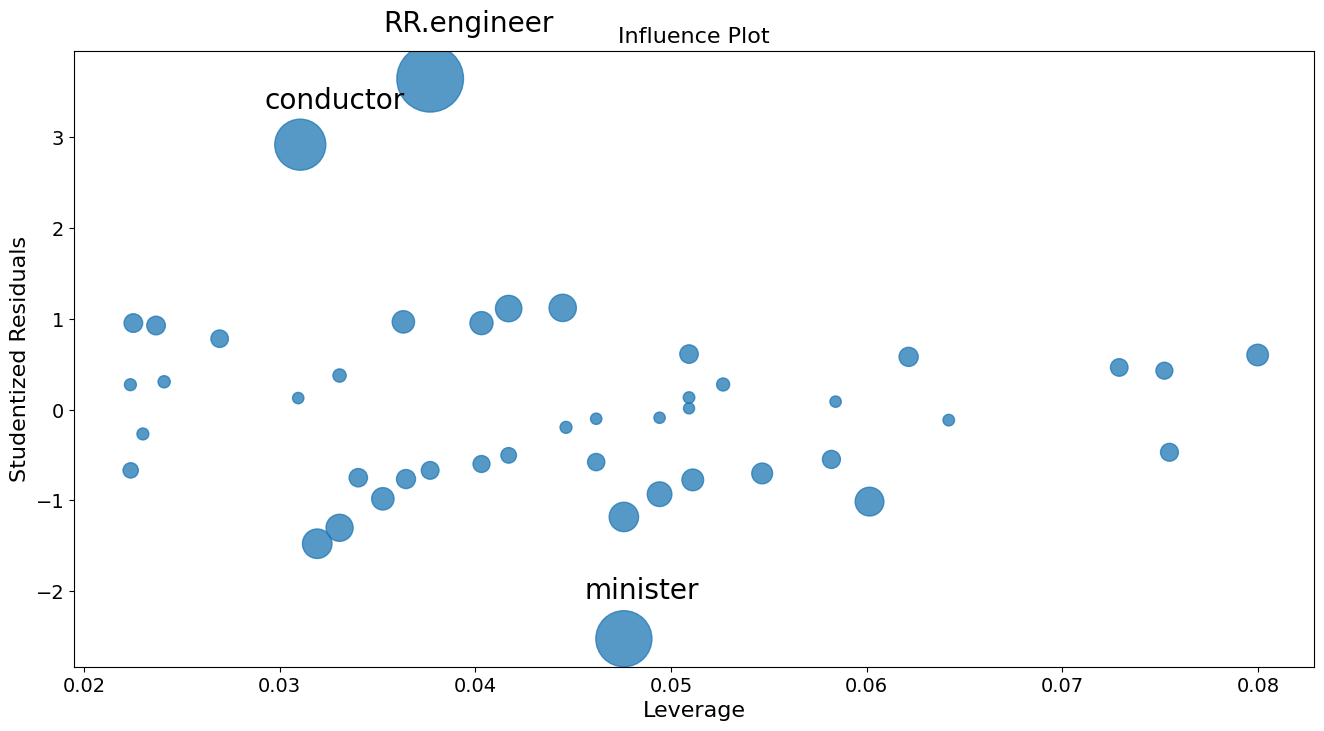

In [55]:
fig = sm.graphics.influence_plot(ols_model, criterion='cooks')

As our lovely professor showed us earlier, it seems that railroad engineer and minister have a high influence on the results, given their unusual (relative to the rest of the data) income relative to education.

## Formula notation example

For whatever reason, when we use the `formula` api, we use lowercase for ols. Here, we're predicting prestige based on the following variables.

In [61]:
import statsmodels.formula.api as smf

model1 = smf.ols('prestige ~ education', data = duncan_prestige).fit()
model2 = smf.ols('prestige ~ income', data = duncan_prestige).fit()
model3 = smf.ols('prestige ~ income + education', data = duncan_prestige).fit()

In [63]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     113.8
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           1.17e-13
Time:                        15:37:04   Log-Likelihood:                -189.50
No. Observations:                  45   AIC:                             383.0
Df Residuals:                      43   BIC:                             386.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2840      5.093      0.056      0.9

In [64]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           7.14e-13
Time:                        15:37:13   Log-Likelihood:                -191.38
No. Observations:                  45   AIC:                             386.8
Df Residuals:                      43   BIC:                             390.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4566      5.190      0.473      0.6

In [65]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           8.65e-17
Time:                        15:37:20   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1